In [1]:
import torch, torchvision
torch.__version__

'1.12.0+cu113'

# Install

In [ ]:
#%cd /content/
#!git clone https://github.com/facebookresearch/Detectron
#%cd /content/iopath
#!python setup.py install

In [3]:
!python -m pip install 'git+https://github.com/facebookresearch/detectron2.git'

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Cloning https://github.com/facebookresearch/detectron2.git to /tmp/pip-req-build-27wrqqi4
  Running command git clone -q https://github.com/facebookresearch/detectron2.git /tmp/pip-req-build-27wrqqi4
     |████████████████████████████████| 50 kB 7.8 MB/s 
     |████████████████████████████████| 79 kB 10.2 MB/s 
     |████████████████████████████████| 151 kB 73.1 MB/s 
     |████████████████████████████████| 1.4 MB 59.7 MB/s 
     |████████████████████████████████| 509 kB 73.0 MB/s 
     |████████████████████████████████| 248 kB 77.3 MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Installing backend dependencies ... done
    Preparing wheel metadata ... done
     |████████████████████████████████| 843 kB 65.7 MB/s 
     |████████████████████████████████| 96 kB 6.9 MB/s 
     |████████████████████████████████| 596 kB 64.4 MB/s 
     |███████

Connect to Drive

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Import Libraries

In [4]:
%cd "/content/drive/MyDrive/detectron2"
import detectron2
from detectron2.utils.logger import setup_logger
setup_logger()

# import some common libraries
import matplotlib.pyplot as plt
import numpy as np
import cv2
from google.colab.patches import cv2_imshow
from detectron2.utils.visualizer import Visualizer
# import some common detectron2 utilities
from detectron2.engine import DefaultPredictor
from detectron2.config import get_cfg

from detectron2.data import MetadataCatalog, DatasetCatalog

/content/drive/.shortcut-targets-by-id/1LTtDB12pEegDU4U4QYNE0gHfzrTHVVmx/detectron2


Register the COCO Instances
Dataset must be in COCO Format

In [5]:
from detectron2.data.datasets import register_coco_instances
register_coco_instances("grapes3", {}, "/content/drive/MyDrive/Segmentation/data/train_polygons_instances.json", "/content/drive/MyDrive/Segmentation/data/train")

In [6]:
fruits_nuts_metadata = MetadataCatalog.get("grapes3")
dataset_dicts = DatasetCatalog.get("grapes3")

[07/28 07:25:55 d2.data.datasets.coco]: Loading /content/drive/MyDrive/Segmentation/data/train_polygons_instances.json takes 1.01 seconds.
[07/28 07:25:55 d2.data.datasets.coco]: Loaded 110 images in COCO format from /content/drive/MyDrive/Segmentation/data/train_polygons_instances.json


In [7]:
# import random

# for d in random.sample(dataset_dicts, 1):
#     img = cv2.imread(d["file_name"])
#     visualizer = Visualizer(img[:, :, ::-1], metadata=fruits_nuts_metadata, scale=0.5)
#     vis = visualizer.draw_dataset_dict(d)
#     cv2_imshow(vis.get_image()[:, :, ::-1])

In [8]:
from detectron2.engine import DefaultTrainer
from detectron2.config import get_cfg
import os

Creating Config file
Training epoch can be extended by increasing MAX_ITER and BATCH_SIZE_PER_IMAGE

In [9]:
cfg = get_cfg()
cfg.merge_from_file("/content/drive/MyDrive/detectron2/configs/COCO-InstanceSegmentation/mask_rcnn_R_50_FPN_3x.yaml")
cfg.DATASETS.TRAIN = ("grapes2",)
cfg.DATASETS.TEST = ()   # no metrics implemented for this dataset
cfg.DATALOADER.NUM_WORKERS = 2
cfg.MODEL.WEIGHTS = "detectron2://COCO-InstanceSegmentation/mask_rcnn_R_50_FPN_3x/137849600/model_final_f10217.pkl"  # initialize from model zoo
cfg.SOLVER.IMS_PER_BATCH = 2
cfg.SOLVER.BASE_LR = 0.02
cfg.SOLVER.CHECKPOINT_PERIOD = 200
cfg.SOLVER.MAX_ITER = 8000   # 300 iterations seems good enough, but you can certainly train longer
cfg.MODEL.ROI_HEADS.BATCH_SIZE_PER_IMAGE = 1024   # faster, and good enough for this toy dataset
cfg.MODEL.ROI_HEADS.NUM_CLASSES = 1  # 3 classes (data, fig, hazelnut)
cfg.MODEL.WEIGHTS = os.path.join(cfg.OUTPUT_DIR, "model_final.pth")
cfg.MODEL.ROI_HEADS.SCORE_THRESH_TEST = 0.5   # set the testing threshold for this model
cfg.DATASETS.TEST = ("grapes2", )
predictor = DefaultPredictor(cfg)

# for training #
#cfg.OUTPUT_DIR = "/content/drive/MyDrive/detectron2"
#trainer = DefaultTrainer(cfg) 
#trainer.resume_or_load(resume=True)
#trainer.train()

[07/28 07:26:07 d2.checkpoint.c2_model_loading]: Following weights matched with model:
| Names in Model                                  | Names in Checkpoint                                                                                  | Shapes                                          |
|:------------------------------------------------|:-----------------------------------------------------------------------------------------------------|:------------------------------------------------|
| backbone.bottom_up.res2.0.conv1.*               | backbone.bottom_up.res2.0.conv1.{norm.bias,norm.running_mean,norm.running_var,norm.weight,weight}    | (64,) (64,) (64,) (64,) (64,64,1,1)             |
| backbone.bottom_up.res2.0.conv2.*               | backbone.bottom_up.res2.0.conv2.{norm.bias,norm.running_mean,norm.running_var,norm.weight,weight}    | (64,) (64,) (64,) (64,) (64,64,3,3)             |
| backbone.bottom_up.res2.0.conv3.*               | backbone.bottom_up.res2.0.conv3.{norm.bia

Visualization of our COCO Dataset output

/usr/local/lib/python3.7/dist-packages/torch/functional.py:478: UserWarning: torch.meshgrid: in an upcoming release, it will be required to pass the indexing argument. (Triggered internally at  ../aten/src/ATen/native/TensorShape.cpp:2894.)
  return _VF.meshgrid(tensors, **kwargs)  # type: ignore[attr-defined]


ben umut


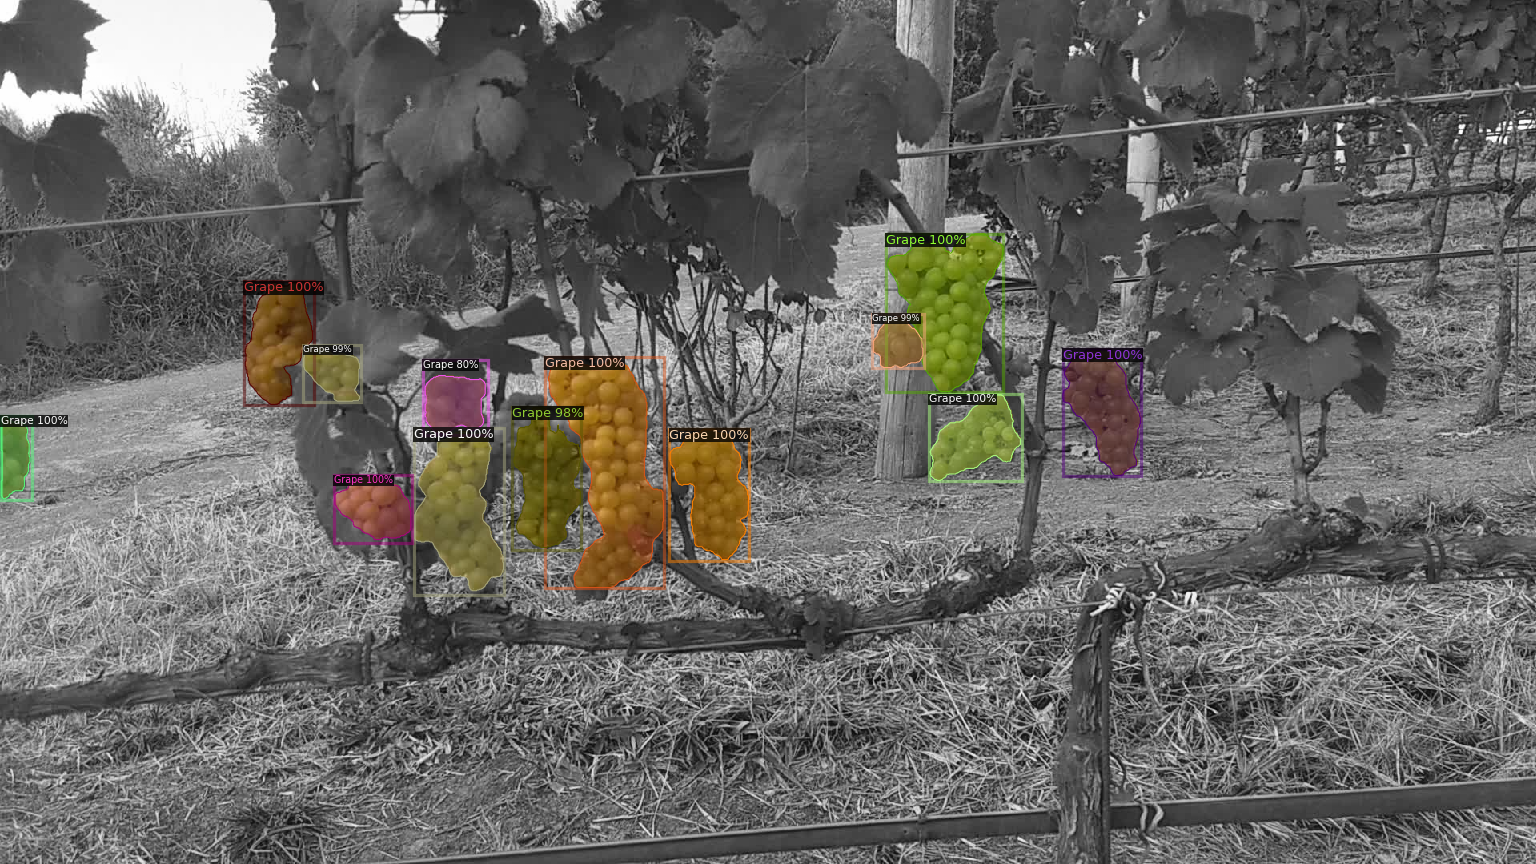

In [10]:
from detectron2.utils.visualizer import ColorMode
from detectron2.utils.visualizer import Visualizer
im = cv2.imread("/content/drive/MyDrive/frame-00003.jpg")
outputs = predictor(im)
v = Visualizer(im[:, :, ::-1],  # RGB to BGR
                   metadata=fruits_nuts_metadata, 
                   scale=0.8, 
                   instance_mode=ColorMode.IMAGE_BW   # remove the colors of unsegmented pixels
    )
v = v.draw_instance_predictions(outputs["instances"].to("cpu"))
cv2_imshow(v.get_image()[:, :, ::-1])

Polygons predicted by model

In [11]:
print(dir(outputs))
print(outputs.keys())
print(outputs["instances"].get_fields()["pred_masks"])

['__class__', '__contains__', '__delattr__', '__delitem__', '__dir__', '__doc__', '__eq__', '__format__', '__ge__', '__getattribute__', '__getitem__', '__gt__', '__hash__', '__init__', '__init_subclass__', '__iter__', '__le__', '__len__', '__lt__', '__ne__', '__new__', '__reduce__', '__reduce_ex__', '__repr__', '__setattr__', '__setitem__', '__sizeof__', '__str__', '__subclasshook__', 'clear', 'copy', 'fromkeys', 'get', 'items', 'keys', 'pop', 'popitem', 'setdefault', 'update', 'values']
dict_keys(['instances'])
tensor([[[False, False, False,  ..., False, False, False],
         [False, False, False,  ..., False, False, False],
         [False, False, False,  ..., False, False, False],
         ...,
         [False, False, False,  ..., False, False, False],
         [False, False, False,  ..., False, False, False],
         [False, False, False,  ..., False, False, False]],

        [[False, False, False,  ..., False, False, False],
         [False, False, False,  ..., False, False, Fa

Polygons turned into numpy array and visualized

torch.Size([13, 1080, 1920])
(13, 1080, 1920)


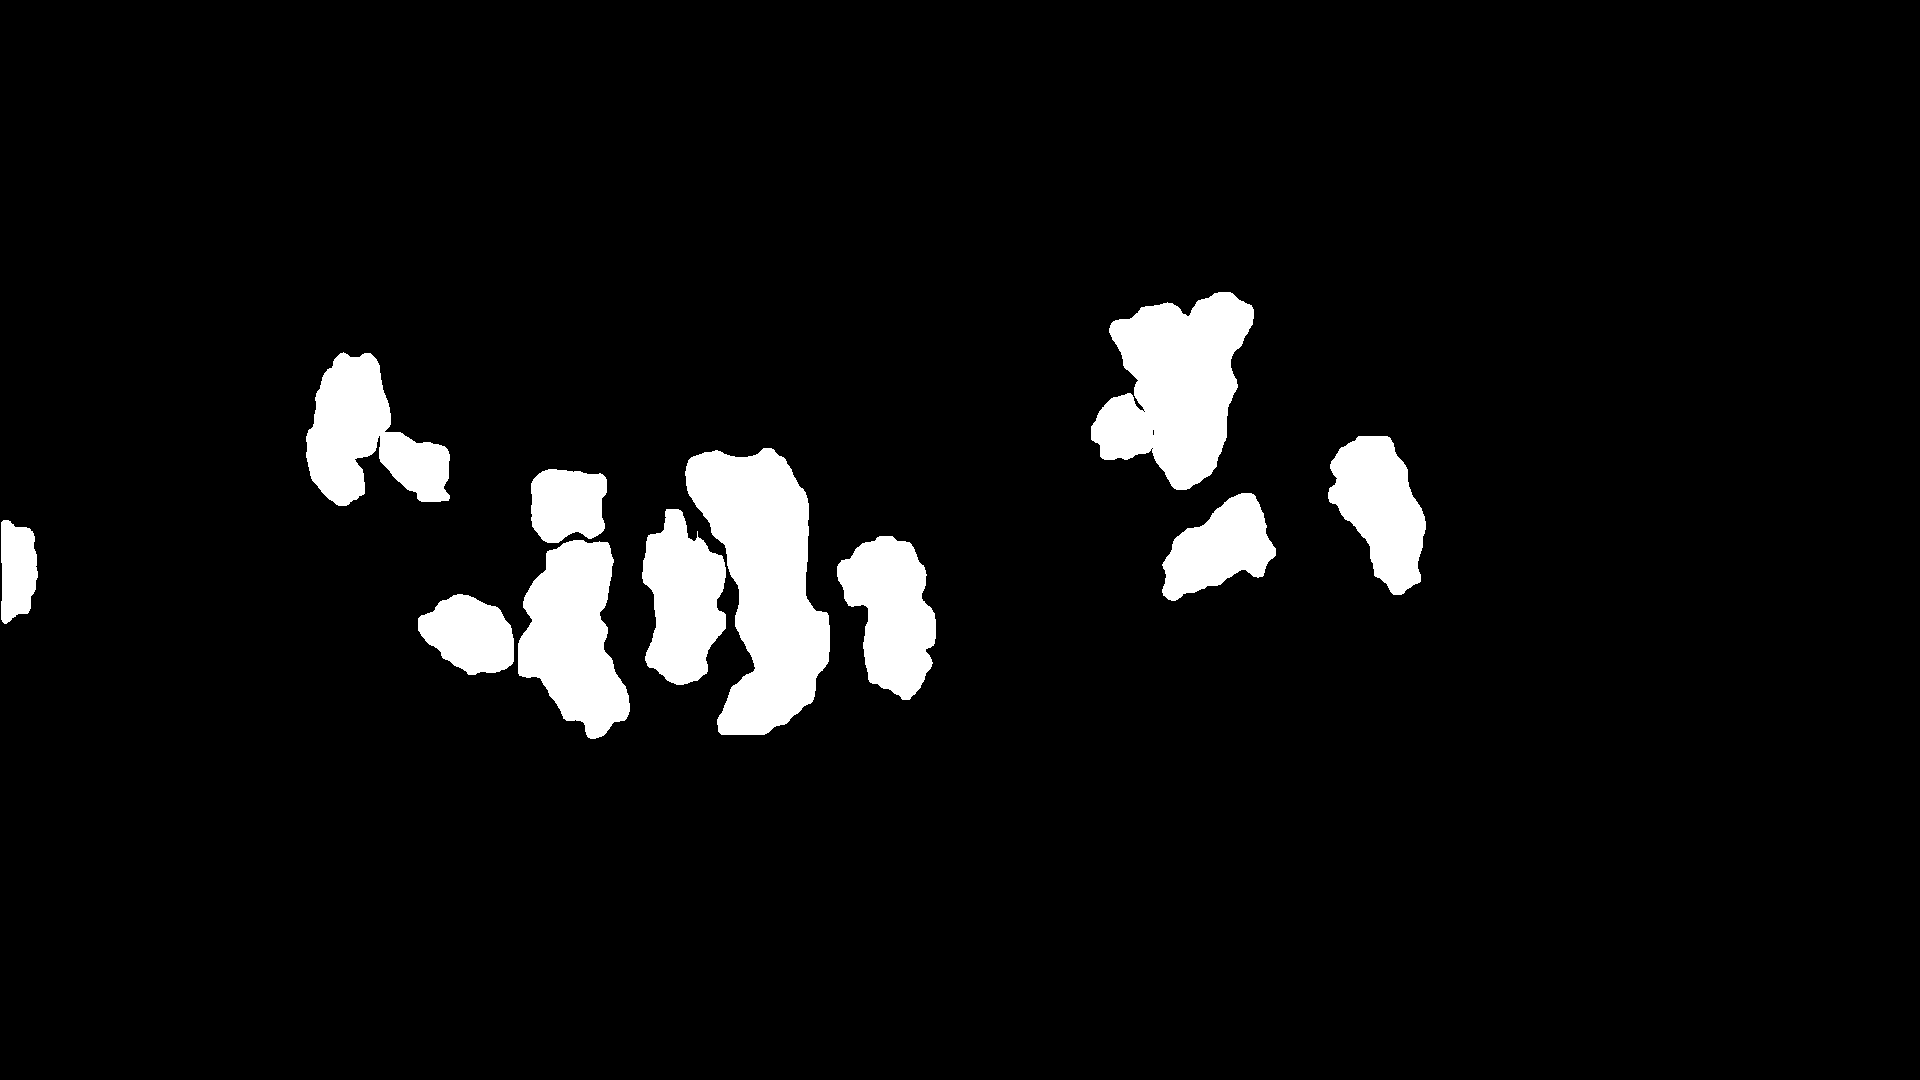

In [12]:
pred_masks = (outputs['instances']).get_fields()['pred_masks']
print(pred_masks.shape)
pred_mask_array = np.array(pred_masks.cpu().detach())
print(pred_mask_array.shape)
tmp_img_fin = np.zeros((1080, 1920))
tmp_img = np.zeros((1080, 1920))

for img_couter in range(13):
  tmp_img = np.zeros((1080, 1920))
  tmp_img[pred_mask_array[img_couter,:,:] == True] = 255
  tmp_img_fin += tmp_img

cv2_imshow(tmp_img_fin)


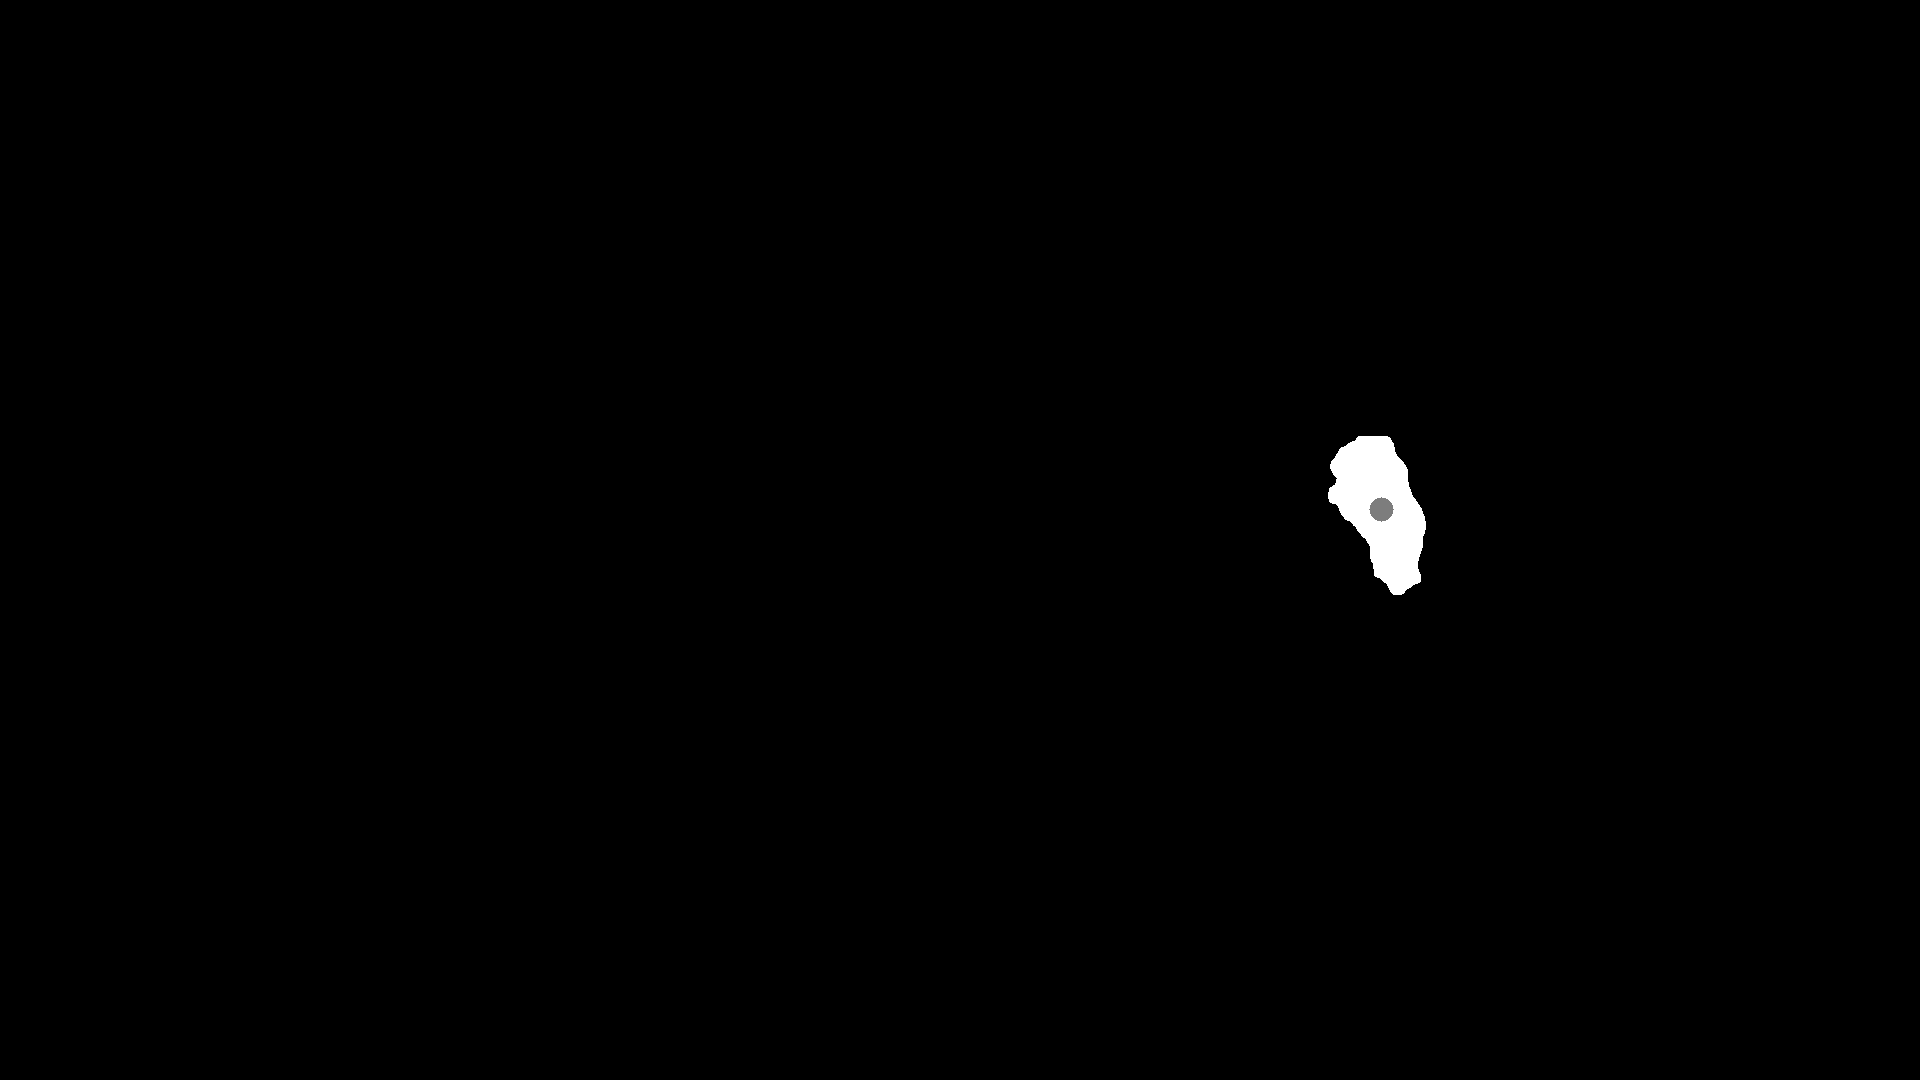

In [13]:
# finding center of only one of grapes 
pred_masks = (outputs['instances']).get_fields()['pred_masks']
pred_mask_array = np.array(pred_masks.cpu().detach())
tmp_img_fin = np.zeros((1080, 1920))
tmp_img = np.zeros((1080, 1920))
tmp_img[pred_mask_array[0,:,:] == True] = 255


result = np.where(tmp_img == 255)  
listOfCoordinates = list(zip(result[0],result[1]))
coordinates_array = np.array(listOfCoordinates) 
counter1 = 0
counter2 = 0
for i in range(coordinates_array.shape[0]):
  counter1 = counter1 + coordinates_array[i,0]
  counter2 = counter2 + coordinates_array[i,1]
  
result_y = counter1 / coordinates_array.shape[0]
result_x = counter2 / coordinates_array.shape[0]

result_y = round(result_y) + 1
result_x = round(result_x) + 1

center_coordinates = (result_x,result_y)
image = cv2.circle(tmp_img, center_coordinates, 2 , (125,125,125),20)
cv2_imshow(image)


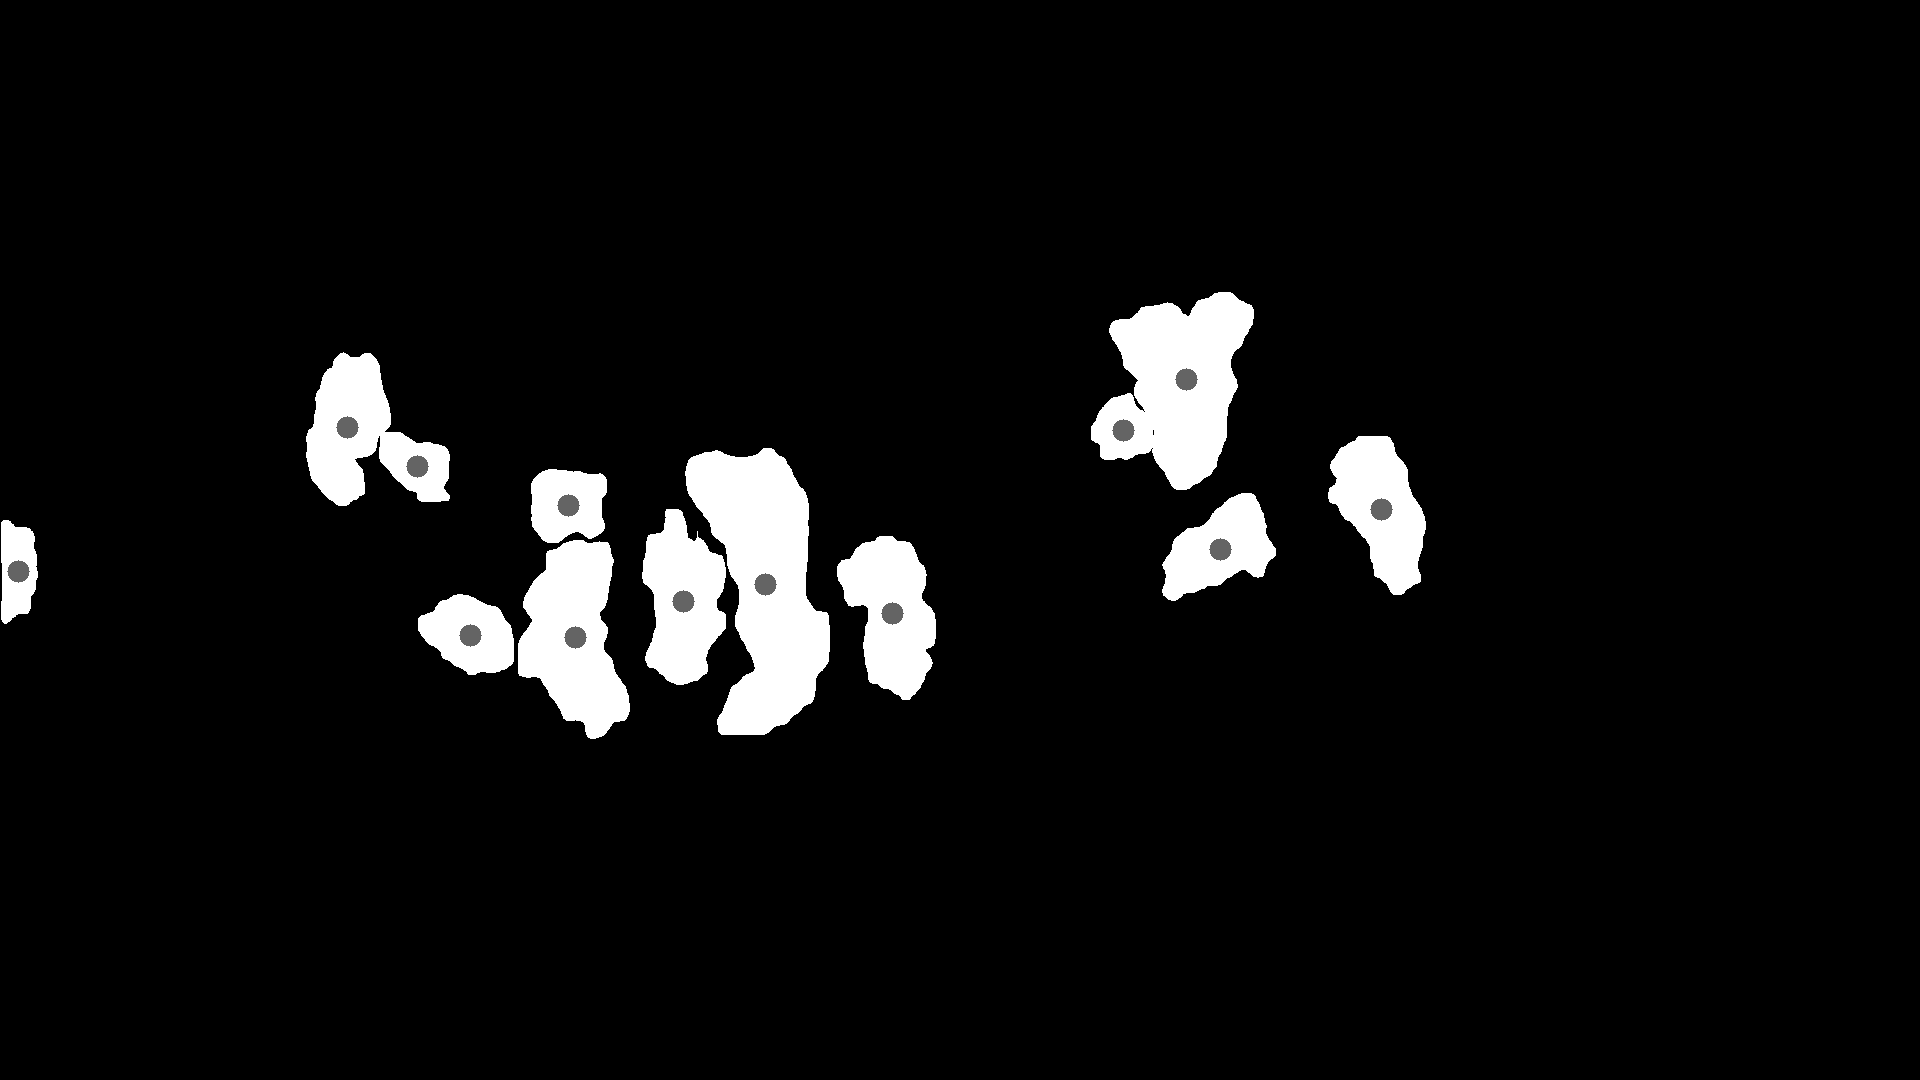

In [14]:
# finding center of the all grapes and printing to one variable.

pred_masks = (outputs['instances']).get_fields()['pred_masks']
pred_mask_array = np.array(pred_masks.cpu().detach())
tmp_img = np.zeros((1080, 1920))
tmp_img_fin = np.zeros((1080, 1920))
tmp_img2 = np.zeros((1080,1920))
for img_couter in range(13):
  tmp_img = np.zeros((1080, 1920))
  tmp_img[pred_mask_array[img_couter,:,:] == True] = 255
  tmp_img_fin += tmp_img
  tmp_img2 = tmp_img
  result = np.where(tmp_img == 255)  
  listOfCoordinates = list(zip(result[0],result[1]))
  coordinates_array = np.array(listOfCoordinates) 
  result_y = 0
  result_x = 0
  counter1 = 0
  counter2 = 0
  for i in range(coordinates_array.shape[0]):
      counter1 = counter1 + coordinates_array[i,0]
      counter2 = counter2 + coordinates_array[i,1]
      
  result_y = counter1 / coordinates_array.shape[0]
  result_x = counter2 / coordinates_array.shape[0]

  result_y = round(result_y) + 1
  result_x = round(result_x) + 1
  center_coordinates = (result_x,result_y)
  image = cv2.circle(tmp_img_fin, center_coordinates, 1 , (100,75,75),20)
  
cv2_imshow(image)


In [15]:
def object_segmentation(video_source):
  source=video_source
  cap=cv2.VideoCapture(source)
  while cap.isOpened():
      ret,frame = cap.read()

      outputs = predictor(frame)
      v = Visualizer(frame[:, :, ::-1],metadata=fruits_nuts_metadata, scale=0.8, instance_mode=ColorMode.IMAGE_BW)  # remove the colors of unsegmented pixels
      v = v.draw_instance_predictions(outputs["instances"].to("cpu"))
      results = v.get_image()[:, :, ::-1]
      cv2_imshow(cv2.cvtColor(results,cv2.COLOR_RGB2BGR))
      if cv2.waitKey(10) & 0xFF == ord('q'):
          break
          
  cap.release()
  cv2.destroyAllWindows()